### Calculating Beta for Top 25 S&P500

This program reads in the daily closing prices of the top 25 stocks in the S&P500 and calculates the beta values.

In [2]:
# Import libraries and dependencies
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
from sklearn.linear_model import LinearRegression
 
tickers = ['AAPL', 'ABBV', 'AMZN', 'BAC', 'BRK-B', 'CVX', 'GOOGL', 'GOOG', 'HD', 'JNJ', 'JPM',
          'KO', 'LLY', 'MA', 'META', 'MRK', 'MSFT', 'NVDA', 'PEP', 'PFE', 'PG', 'TSLA', 'UNH', 'V', 'XOM', '^GSPC']
start = dt.datetime(2012, 10, 31)
end = dt.datetime(2022, 10, 28)
 
data = pdr.get_data_yahoo(tickers, start, end, interval="m")
 
data = data['Adj Close']
 
log_returns = np.log(data/data.shift())


In [19]:
cov = log_returns.cov()
var = log_returns['^GSPC'].var()
stock = ['AAPL', 'ABBV', 'AMZN', 'BAC', 'BRK-B', 'CVX', 'GOOGL', 'GOOG', 'HD', 'JNJ', 'JPM',
          'KO', 'LLY', 'MA', 'META', 'MRK', 'MSFT', 'NVDA', 'PEP', 'PFE', 'PG', 'TSLA', 'UNH', 'V', 'XOM']
cov_stock=cov.loc[stock, '^GSPC']/var

text = print("The Beta of the top 25 stocks in the S&P 500 are: ",cov.loc[stock, '^GSPC']/var)

with open("beta_sp500.txt", "w") as text_file:
    print(f"The Beta of the top 25 stocks in the S&P 500 are: {cov_stock}", file=text_file)



The Beta of the top 25 stocks in the S&P 500 are:  Symbols
AAPL     1.206670
ABBV     0.850271
AMZN     1.262841
BAC      1.414731
BRK-B    0.897049
CVX      1.163672
GOOGL    1.029036
GOOG     1.027596
HD       0.978358
JNJ      0.600632
JPM      1.171190
KO       0.636172
LLY      0.325735
MA       1.117433
META     1.034769
MRK      0.472645
MSFT     0.916416
NVDA     1.634955
PEP      0.617423
PFE      0.715729
PG       0.450346
TSLA     1.570585
UNH      0.709490
V        0.943686
XOM      1.060405
Name: ^GSPC, dtype: float64


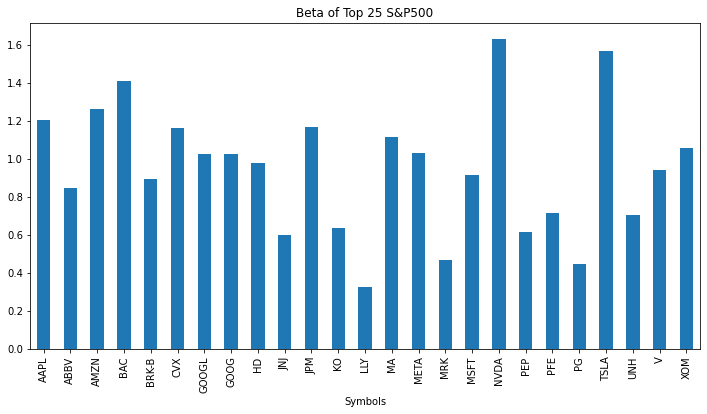

In [39]:
beta_plot = cov_stock.plot(kind="bar", title="Beta of Top 25 S&P500", figsize=(12,6)).figure

In [40]:
beta_plot.savefig('top_25_beta.png')